# Cargamos las librerías


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline




/home/jesus/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Leer la data


In [2]:
df=pd.read_csv('data.csv')


# Data

- G   : Género
- E   : Edad
- NEU : Neutrofilos
- LIN : Linfocitos
- RNL : Relación Neutrófilo Linfocito
- DX1 : Diagnóstico 1
- DX2 : Diagnóstico 2
- DX3 : Diagnóstico 3
- DX4 : Diangóstico 4
- ME  : Motivo de Egreso {M: 'Mejoría',D: 'Defunsión'}


In [3]:
df.head()

,Nombre,G,E,NEU,LIN,RNL,DX1,DX2,DX3,DX4,ME
0,AGUILAR TORRES JUANITA,M,64,13.81,2.12,6.51,CHS,ABDO,NaN,NaN,M
1,AGUINAGA REYES MARIA LUISA,M,78,8.79,1.58,5.56,IAM,NaN,NaN,NaN,M
2,ALARCON GOMEZ FRANCISCO,H,96,4.18,0.93,4.49,IAM,NaN,NaN,NaN,M
3,ALVA MUCIÑO ESTHER,M,56,8.87,2.75,3.23,EHHNC,NaN,NaN,NaN,M
4,ALVA SEGURA FERNANDO,H,75,5.97,1.12,5.33,IAM,NaN,NaN,NaN,M


# Análisis descriptivo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde8f8e3518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fde8f752550>]], dtype=object)

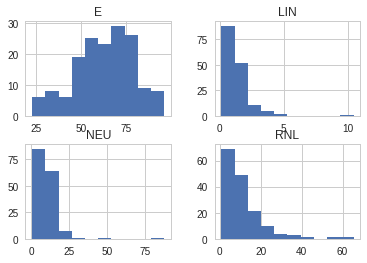

In [4]:
df.hist()

In [5]:
df.groupby('G').count()

,Nombre,E,NEU,LIN,RNL,DX1,DX2,DX3,DX4,ME
G,,,,,,,,,,
H,79,79,79,79,79,79,31,11,0,79
M,80,80,80,80,80,80,44,13,1,80


In [6]:
df.groupby('ME').count()

,Nombre,G,E,NEU,LIN,RNL,DX1,DX2,DX3,DX4
ME,,,,,,,,,,
D,35,35,35,35,35,35,35,29,10,1
M,124,124,124,124,124,124,124,46,14,0


In [7]:
df.groupby(['G','ME']).count()

Nombre   E  NEU  LIN  RNL  DX1  DX2  DX3  DX4
G ME                                               
H D       16  16   16   16   16   16   11    3    0
  M       63  63   63   63   63   63   20    8    0
M D       19  19   19   19   19   19   18    7    1
  M       61  61   61   61   61   61   26    6    0

In [8]:
df.groupby(['DX1']).count()[['G','ME']].sort_values('G',ascending=False).head()

,G,ME
DX1,,
IAM,31,31
CHS,24,24
POAR,20,20
CAD,13,13
EHHNC,12,12


In [9]:
df.groupby(['DX2']).count()[['G','ME']].sort_values('G',ascending=False).head()

,G,ME
DX2,,
LAPE,9,9
POAR,8,8
UROSEP,6,6
NEUMO,4,4
SD,3,3


In [10]:
df.groupby(['DX3']).count()[['G','ME']].sort_values('G',ascending=False).head()

,G,ME
DX3,,
LAPE,10,10
IVU,2,2
APEN,1,1
CCT,1,1
EHHNC,1,1


In [11]:
df.groupby(['DX4']).count()[['G','ME']].sort_values('G',ascending=False).head()

,G,ME
DX4,,
CCT,1,1


Convertimos tanto el género como el motivo de egreso a valores numéricos
- G  : {0: 'Mujer',1: 'Hombre'}
- ME : {0: 'Mejoría',1: 'Defunción'}

In [12]:
df.loc[df.G=='M','G']=0
df.loc[df.G=='H','G']=1
df.EDAD=df.E.astype(int)
df=df.fillna('')
df.loc[df.ME=='M','ME']=0
df.loc[df.ME=='D','ME']=1


In [13]:
df['LEU'] = df.NEU + df.LIN

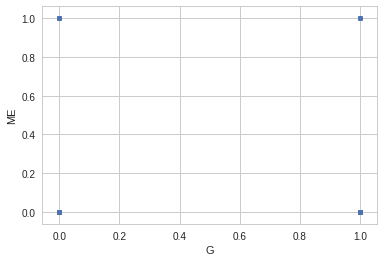

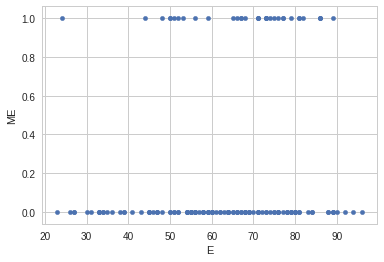

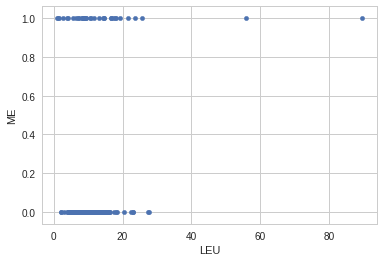

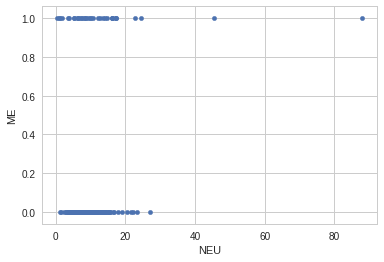

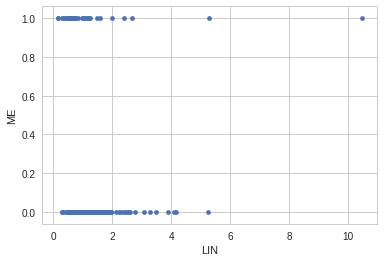

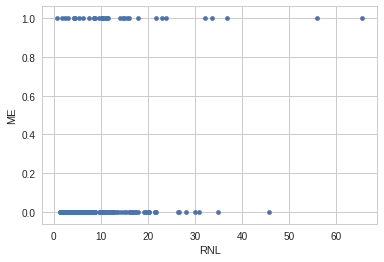

In [14]:
variables=['G','E','LEU','NEU','LIN','RNL']
for v in variables:
    df.plot.scatter(x=v,y='ME')

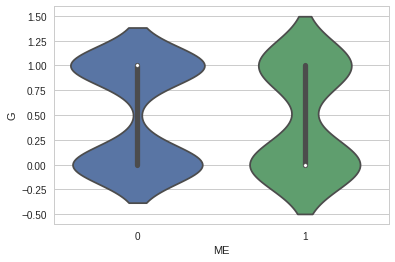

In [15]:
sns.violinplot(x='ME', y="G", data=df)

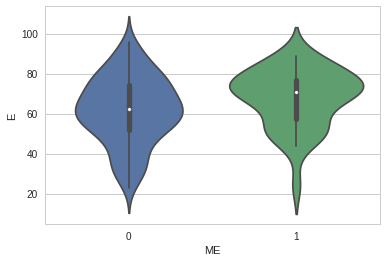

In [16]:
sns.violinplot(x='ME', y="E", data=df)

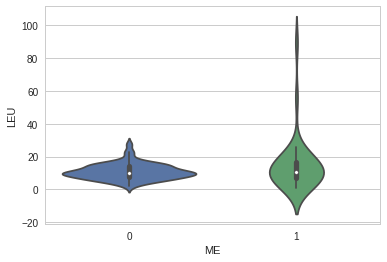

In [17]:
sns.violinplot(x='ME', y="LEU", data=df)

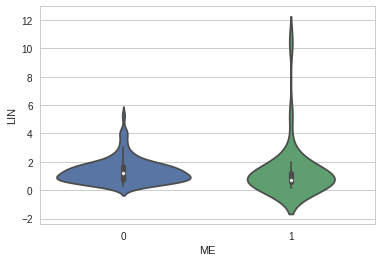

In [18]:
sns.violinplot(x='ME', y="LIN", data=df)

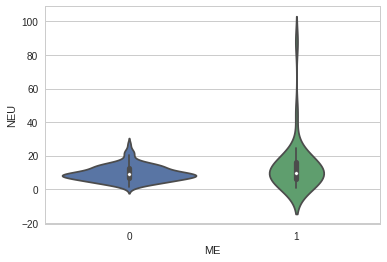

In [19]:
sns.violinplot(x='ME', y="NEU", data=df)

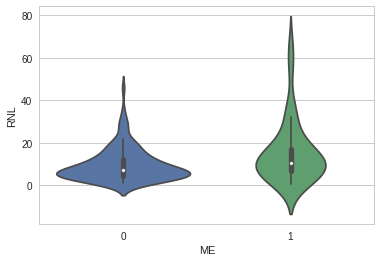

In [20]:
sns.violinplot(x='ME', y="RNL", data=df)

### Calculamos los promedios por caracteristica

In [21]:
df.groupby('ME').mean()

,G,E,NEU,LIN,RNL,LEU
ME,,,,,,
0,0.508065,61.701613,9.605403,1.360000,9.700242,10.965403
1,0.457143,67.828571,13.397143,1.291143,15.323143,14.688286


In [22]:
### Calculamos las desviaciones estandard


In [23]:
df.groupby('ME').std()

,G,E,NEU,LIN,RNL,LEU
ME,,,,,,
0,0.501963,16.579437,4.632684,0.848170,7.622680,4.734367
1,0.505433,14.425235,15.461990,1.848703,14.411154,16.309307


In [24]:
u = df.groupby('ME').mean().apply(lambda r: abs(r[1]-r[0]))
u

G      0.050922
E      6.126959
NEU    3.791740
LIN    0.068857
RNL    5.622901
LEU    3.722882
dtype: float64

In [25]:
v = ((df.groupby('ME').std()**2)/(df.groupby('ME')[['E','G','LEU','LIN','RNL','NEU']].count())).sum()
v

E      8.162110
G      0.009331
LEU    7.780574
LIN    0.103450
NEU    7.003740
RNL    6.402344
dtype: float64

In [26]:
u = u/np.sqrt(v)
u = u.reset_index().rename(columns = {0: 't_prueba'})
u['Hipotesis'] = u['t_prueba']>1.8946 
u

,index,t_prueba,Hipotesis
0,E,2.144587,True
1,G,0.527158,False
2,LEU,1.334669,False
3,LIN,0.214084,False
4,NEU,1.432760,False
5,RNL,2.222240,True


# Conclusión 1

- La edad y la Razón NL están relacionadas al motivo de egreso

# Modelos

In [74]:
clf = linear_model.LogisticRegression(C=1e5)


y=df.ME.values
y = np.array(y,dtype= int)
X=df[['RNL']].values
X=np.array(X,dtype= float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [75]:

clf.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [76]:
## Más análisis estadísticos


In [62]:
df.groupby(['DX1','ME']).aggregate(['mean','std','count'])[['E','RNL']]

E                         RNL                 
                  mean        std count       mean        std count
DX1      ME                                                        
ANGOR IN 0   70.000000  14.142136     2   2.190000   0.056569     2
BAVC     0   58.000000        NaN     1   3.720000        NaN     1
CAD      0   54.230769  12.397270    13   8.051538   5.059820    13
CHA      0   54.000000        NaN     1   5.640000        NaN     1
         1   75.000000        NaN     1  23.830000        NaN     1
CHC      0   76.000000        NaN     1   4.270000        NaN     1
         1   73.333333   7.767453     3   8.053333   6.159646     3
CHH      0   54.000000  17.349352     3  13.006667   3.333802     3
         1   62.500000  20.047444     6  14.321667  11.815392     6
CHS      0   62.375000  13.521808     8   8.378750   6.833028     8
         1   67.812500  11.737227    16  13.740000  13.244267    16
CHS      1   47.000000   4.242641     2   7.645000   4.900250     2
CPS      0   55.000000        NaN     1  45.630000        NaN     1
CRI HIP  0   80.000000        NaN     1   6.090000        NaN     1
CRIS HIP 0   30.000000        NaN     1   1.470000        NaN     1
DHE      0   45.000000        NaN     1  34.820000        NaN     1
EDADPU   0   68.000000  12.000000     3   9.243333   9.517628     3
EHHNC    0   62.583333  19.085732    12   9.716667   7.327860    12
EMER HI  0   47.000000        NaN     1  13.120000        NaN     1
ENF MAS  1   74.000000        NaN     1  22.950000        NaN     1
EVCH     0   53.500000   9.192388     2   4.690000   4.044651     2
EVCI     0   33.000000        NaN     1   4.620000        NaN     1
FOM      1   53.000000        NaN     1  65.430000        NaN     1
HELLP    0   37.000000   2.828427     2  14.045000   2.764788     2
HSA      1   56.000000        NaN     1   2.330000        NaN     1
IAM      0   66.774194  16.654748    31   6.767419   5.479543    31
INS HEP  0   57.000000        NaN     1   6.670000        NaN     1
NEUMO    0   60.000000  29.715316     3  15.300000   5.496290     3
         1   85.333333   4.041452     3  20.816667  14.272878     3
NEUNO    0   61.666667   5.859465     3  13.113333   8.070826     3
PAN      0   61.000000   4.242641     2  11.660000   4.596194     2
POAR     0   68.578947  12.915606    19  14.006316   7.144782    19
         1   86.000000        NaN     1  14.100000        NaN     1
PREE     0   27.000000        NaN     1   5.720000        NaN     1
PREE G   0   31.333333   3.785939     3  14.873333   9.929624     3
QUE ELE  0   56.000000        NaN     1   4.210000        NaN     1
SEPSIS   0   76.000000        NaN     1  10.140000        NaN     1
SXPR     0   62.000000        NaN     1  12.570000        NaN     1
TSV      0   74.750000   7.410578     4   4.537500   4.265031     4

In [63]:
## relación edad rnli

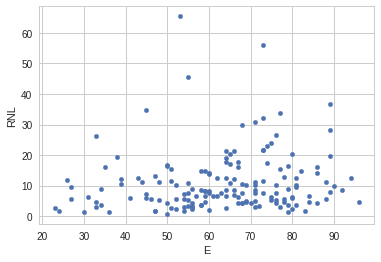

In [65]:
df.plot(x='E',y='RNL',kind = 'scatter')

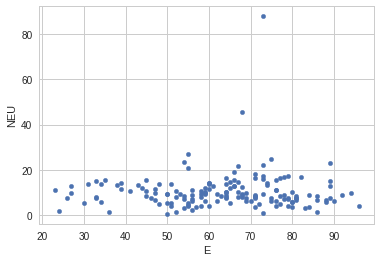

In [66]:
df.plot(x='E',y='NEU',kind = 'scatter')

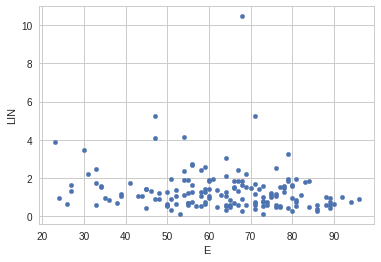

In [68]:
df.plot(x='E',y='LIN',kind = 'scatter')

In [71]:
df.E.corr(df.RNL)

0.12322532251385347

## ROC

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## xgboost